# Machine Learning Algorithms

## The Algorithm Cheat Sheet

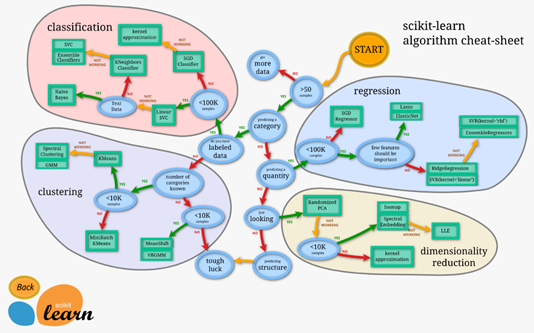

## 1.	Generalized Linear Models
Linear model specifies the (linear) relationship between a dependent (or response) variable Y, and a set of predictor variables Xs


### OLS
- Ordinary Least Squares is typical linear regression 

First we will load Boston housing price dataset

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


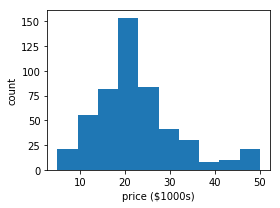

In [4]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

data = load_boston()
print (data.feature_names)

plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

# for index, feature_name in enumerate(data.feature_names):
#    plt.figure(figsize=(4, 3))
#    plt.scatter(data.data[:, index], data.target)
#    plt.ylabel('Price', size=15)
#    plt.xlabel(feature_name, size=15)
#    plt.tight_layout()

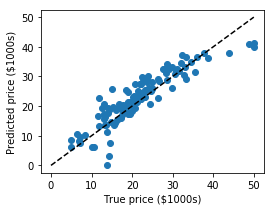

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

# print (data.data)

clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()

### Ridge Regression 
- Imposing a penalty on the size of coefficients which minimize a penalized residual sum of squares. Larger the value of penalizer, the greater the amount of shrinkage and the coefficients become more robust to collinearity of features. L2 regularized (penalty impacts by square of coefficient; use cross val to optimize) Variant HuberRegressor is different to Ridge because it applies a linear loss to samples that are classified as outliers.

![image.png](attachment:image.png)

- As Alpha, regularizer, is smaller and smaller, the coefficients blow out of proportion. Can use RidgeCV for  built-in cross-validation of the alpha parameter using GridSearchCV.

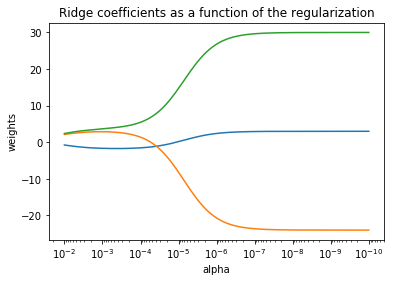

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the nxn Hilbert matrix
n = 3  # size of matrix
X = 1. / (np.arange(1, n+1) + np.arange(0, n)[:, np.newaxis])
y = np.ones(n)

# Compute a range of log alphas  
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)   

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

### Lasso Regression 
- Simultaneously identifies and estimates the most important coefficients by assuming only few variables actually matter (betting on sparsity).
- Effectively reduces the number of variables upon which the given solution is dependent (e.g. in compressed sensing)
- Employs a L1 regularization method

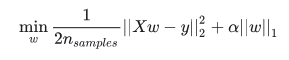

As seen from the example below, as alpha decreases weights of certian features drastically increase. This is likely caused by a feature multicolinearity 

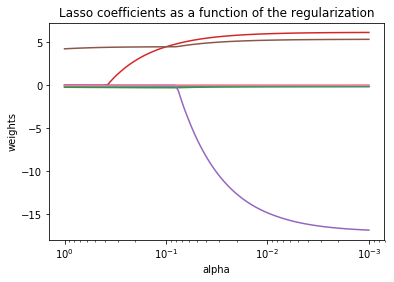

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X and y is from the boston data set at start
coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train[:,0:7], y_train) # choose a subset of X train
    coefs.append(lasso.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

- LassoCV sets its alpha  parameter automatically from the data by internal cross-validation. We use external cross-validation to see how consistent alphas is across different cross-validation folds

Alpha parameters maximising the generalization score on different subsets of the data:
[fold 0] alpha: 0.06462, score: 0.54153
[fold 1] alpha: 0.05298, score: 0.15939
[fold 2] alpha: 0.06462, score: 0.45492


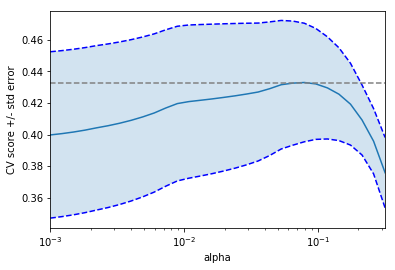

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-3, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(6, 4)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0)
k_fold = KFold(3)

print("Alpha parameters maximising the generalization score on different subsets of the data:")

for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))


plt.show()

### ElasticNet
- Trained with L1 and L2 prior as regularizer. Combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while maintaining the regularization properties of Ridge (trade-off between the two)

### Least-angle regression (LARS)
- Similar to forward stepwise regression, high-dimensional data, at each step, it finds the predictor most correlated with the response
- If two variables are correlated, then their coefficients should increase at approximately the same rate)

#### Stepwise Regression
- Successively adding or removing variables based on t-statistics of coefficients. Used for sifting through large dimensions and/or fine-tuning. Can begin with 0 variables and proceed forward or other way round. Inherently used for high dimensional data

Try varying the n_nonzero_coefs in the code below. 

R_squared =  0.492822477106


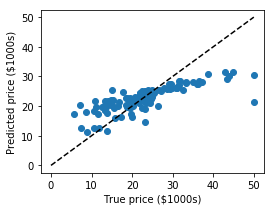

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

reg = linear_model.Lars(n_nonzero_coefs=2)   # change this number to see the increase in predictive power
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)
expected = y_test

print ("R_squared = ", reg.score(X_train, y_train))

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()

### Orthogonal Matching Pursuit (OMP)
- Forward feature selection method like LARS. OMP is based on a greedy algorithm that includes at each step the atom most highly correlated with the current residual
- Not used much in finance, but has applications in signal separation (e.g. recovering a sparse signal from a noisy measurement)


### Bayesian Regression 
- Formulate linear regression using probability distributions rather than points. Y is not a single value, but is assumed to be drawn from a probability distribution. Advantage is adapts to the data and include regularization parameters in the estimation


R_squared =  0.740862582378


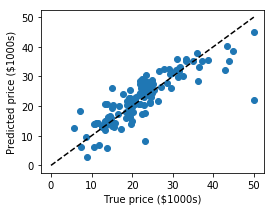

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

reg = linear_model.BayesianRidge()  
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)
expected = y_test

print ("R_squared = ", reg.score(X_train, y_train))
# print (reg.coef_)

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.show()

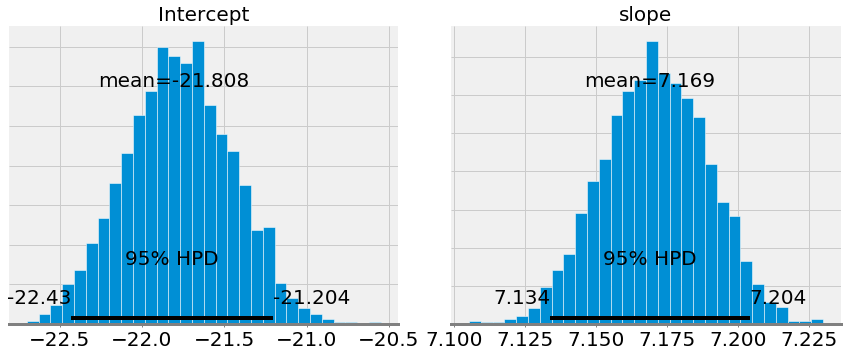

- In Bayesian regression we have a range of possible values for the model parameters. As the number of data points increases, this range will shrink and converge one a single value representing greater confidence in the model parameters.
- A good library other than sklearn is PyMC3 (PyMC3 is a Python package for Bayesian statistical modeling)
- Also, we can extend linear models with basis functions; linear models trained on nonlinear functions of the data. Use with caution due to its tendency to overfit 